# **Python**

**1a**

In [ ]:
def f(n):
      for i in range(n):
       row = ''.join(chr(65 + abs(j-i)) for j in range(2*i + 1))

      print(row.center(2*n - 1, '-'))
#Tests
print(f"f(10)")
f(10)
print(f"f(6)")
f(6)

f(10)
JIHGFEDCBABCDEFGHIJ
f(6)
FEDCBABCDEF


**1b**

In [ ]:
def F(d : dict):
    print(f"Key values sorting in ascending")
    for key in sorted(d.keys()):
        x, y = d[key]
        print(f"-{key}-, -{x}-, -{y}-")

    print(f"x values in descending")
    for x in sorted(d.keys(), key = lambda k: d[k][0]):
        x, y = d[key]
        print(f"-{key}-, -{x}-, -{y}-")
    print(f"y values in ascending")
    for y in sorted(d.keys(), key = lambda k: d[k][1], reverse=True):
        x, y = d[key]
        print(f"-{key}-, -{x}-, -{y}-")

#Tests

F({1 : (1, 2), 2 : (-1, 4), 5 : (-4, 3), 4 : (2, 3)})

Key values sorting in ascending
-1-, -1-, -2-
-2-, --1-, -4-
-4-, -2-, -3-
-5-, --4-, -3-
x values in descending
-5-, --4-, -3-
-5-, --4-, -3-
-5-, --4-, -3-
-5-, --4-, -3-
y values in ascending
-5-, --4-, -3-
-5-, --4-, -3-
-5-, --4-, -3-
-5-, --4-, -3-


In [ ]:
F({-8 : (4, 2), 6 : (-3, 4), 7 : (2, 1), 5 : (9, -10)})

Key values sorting in ascending
--8-, -4-, -2-
-5-, -9-, --10-
-6-, --3-, -4-
-7-, -2-, -1-
x values in descending
-7-, -2-, -1-
-7-, -2-, -1-
-7-, -2-, -1-
-7-, -2-, -1-
y values in ascending
-7-, -2-, -1-
-7-, -2-, -1-
-7-, -2-, -1-
-7-, -2-, -1-


**2a**

In [ ]:
file_path = '/content/student_records.csv'

def read_csv(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    headers = lines[0].strip().split(',')
    data = []
    for line in lines[1:]:
        values = line.strip().split(',')
        record = dict(zip(headers, values))
        data.append(record)
    return data

data = read_csv(file_path)

print("First 10 rows of the data:")
for i, row in enumerate(data[:10], 1):
    print(f"{row}")


First 10 rows of the data:
{'roll_number': '588946', 'department': 'MA', 'credit': '3', 'course_name': 'EC250', 'course_type': 'hasmed_elective', 'grade': 'AB'}
{'roll_number': '145372', 'department': 'EP', 'credit': '4', 'course_name': 'EP407', 'course_type': 'hasmed_elective', 'grade': 'CC'}
{'roll_number': '834515', 'department': 'MA', 'credit': '8', 'course_name': 'EP885', 'course_type': 'hasmed_elective', 'grade': 'BB'}
{'roll_number': '344265', 'department': 'CSE', 'credit': '6', 'course_name': 'CSE699', 'course_type': 'honours', 'grade': 'AB'}
{'roll_number': '358405', 'department': 'MA', 'credit': '3', 'course_name': 'EE460', 'course_type': 'minor', 'grade': 'AP'}
{'roll_number': '781075', 'department': 'CE', 'credit': '8', 'course_name': 'CE540', 'course_type': 'honours', 'grade': 'CC'}
{'roll_number': '180828', 'department': 'CSE', 'credit': '6', 'course_name': 'CE880', 'course_type': 'minor', 'grade': 'AB'}
{'roll_number': '981238', 'department': 'MM', 'credit': '4', 'course

2b

In [ ]:
def calculate_student_cpi():
    """
    Calculate total credits and CPI for each student
    """
    # Grade to point mapping
    grade_points = {
        'AP': 10, 'AA': 10,
        'AB': 9, 'BB': 8,
        'BC': 7, 'CC': 6
    }

    student_records = {}

    with open('/content/student_records.csv', 'r') as file:
        # Skip header
        header = file.readline().strip().split(',')

        for line in file:
            record = line.strip().split(',')
            roll_number = record[0]

            # Initialize student record
            if roll_number not in student_records:
                student_records[roll_number] = {
                    'total_credits': 0,
                    'weighted_sum': 0
                }

            # Extract course details
            credit = float(record[3])
            grade = record[4]
 # Update student record
            if grade in grade_points:
                student_records[roll_number]['total_credits'] += credit
                student_records[roll_number]['weighted_sum'] += credit * grade_points[grade]

    # Calculate and print CPI for each student
    for roll_number, record in student_records.items():
        if record['total_credits'] > 0:
            cpi = record['weighted_sum'] / record['total_credits']
            print(f"Roll No: {roll_number}, Total Credits: {record['total_credits']:.2f}, CPI: {cpi:.2f}")


**2c**

In [ ]:
def check_graduation_requirements():
    """
    Find students meeting graduation requirements
    """
    student_courses = {}

    with open('/content/student_records.csv', 'r') as file:
        # Skip header
        header = file.readline().strip().split(',')

        for line in file:
            record = line.strip().split(',')
            roll_number = record[0]
            course_type = record[1]
            credit = float(record[3])

            # Initialize student record if not exists
            if roll_number not in student_courses:
                student_courses[roll_number] = {
                    'core': 0,
                    'dept_elective': 0,
                    'flexible_elective': 0,
                    'hasmed_elective': 0
                }

 # Update course credits by type
            if course_type == 'Core':
                student_courses[roll_number]['core'] += credit
            elif course_type == 'Department Elective':
                student_courses[roll_number]['dept_elective'] += credit
            elif course_type == 'Flexible Elective':
                student_courses[roll_number]['flexible_elective'] += credit
            elif course_type == 'Hasmed Elective':
                student_courses[roll_number]['hasmed_elective'] += credit

    # Check graduation requirements
    graduation_candidates = []
    for roll_number, credit in student_courses.items():
        if (credit['core'] >= 20 and
            credit['dept_elective'] >= 15 and
            credit['flexible_elective'] >= 10 and
            credit['hasmed_elective'] >= 5):
            graduation_candidates.append(roll_number)

    print("Students meeting graduation requirements:")
    print(graduation_candidates)



**2d**

In [ ]:
def check_minor_completion():
    """
    Find students who completed a minor
    """
    student_minor_credits = {}

    with open('/content/student_records.csv', 'r') as file:
        # Skip header
        header = file.readline().strip().split(',')

        for line in file:
            record = line.strip().split(',')
            roll_number = record[0]
            department = record[2]
            minor_tag = record[5]
            credit = float(record[3])

            # Track minor credits per department for each student
            if minor_tag == 'Minor':
                if roll_number not in student_minor_credits:
                    student_minor_credits[roll_number] = {}

                if department not in student_minor_credits[roll_number]:
                    student_minor_credits[roll_number][department] = 0

                student_minor_credits[roll_number][department] += credit

    # Find students with at least 10 credits in a minor
    minor_students = [
        roll_number for roll_number, dept_credits in student_minor_credits.items()
        if any(credit >= 10 for credit in dept_credits.values())
    ]

    print("Students who completed a minor:")
    print(minor_students)


**2e**

In [ ]:
def check_honours_completion():
    """
    Find students who completed honours
    """
    student_honours_credits = {}

    with open('/content/student_records.csv', 'r') as file:
        # Skip header
        header = file.readline().strip().split(',')

        for line in file:
            record = line.strip().split(',')
            roll_number = record[0]
            course_type = record[1]
            honours_tag = record[5]
            credit = float(record[3])

            # Initialize student record if not exists
            if roll_number not in student_honours_credits:
                student_honours_credits[roll_number] = {
                    'core_credits': 0,
                    'honours_credits': 0
                }

            # Track core and honours credits
            if course_type == 'Core':
                student_honours_credits[roll_number]['core_credits'] += credit
            if honours_tag == 'Honours':
                student_honours_credits[roll_number]['honours_credits'] += credit

    # Find students with honours requirements
    honours_students = [
        roll_number for roll_number, credit in student_honours_credits.items()
        if credit['honours_credits'] >= 10 and credits['core_credits'] >= 20
    ]

    print("Students who completed Honours:")
    print(honours_students)



# **SciPy**

**PartA**

In [ ]:
import numpy as np
from scipy.optimize import minimize

def fun(x):
    return 2*(x[0]-x[1]-3)**2 + 4*(x[0]+2*x[1]+1)**4

constraints = [{'type':'ineq', 'fun': lambda x: x[0] - x[1] + 3},
               {'type':'ineq', 'fun': lambda x: 5-((x[0] + 2)**2 + (x[1]+1)**2)}]

x0 = np.array([0, 0])

result = minimize(fun, x0, constraints=constraints)

print(result.x)
print(result.fun)

[ 0.23492503 -0.92851489]
7.345026216976594


PartB

In [ ]:
import scipy.integrate as spi

def f(t):
    x = np.sqrt(3) * np.cos(t)
    y = np.sqrt(3) * np.sin(t)
    return x**2 + y**4
def integral(t):
    x = np.sqrt(3) * np.cos(t)
    y = np.sqrt(3) * np.sin(t)
    dx_dt = -np.sqrt(3) * np.sin(t)
    dy_dt = np.sqrt(3) * np.cos(t)
    arc_length = np.sqrt(dx_dt**2 + dy_dt**2)
    return f(t) * arc_length

result, errpr = spi.quad(integral, 0, 2*np.pi)
print(result)

53.05363140385085


## **Numpy**

Time taken for the algorithm to converge: 0.0009694099426269531


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

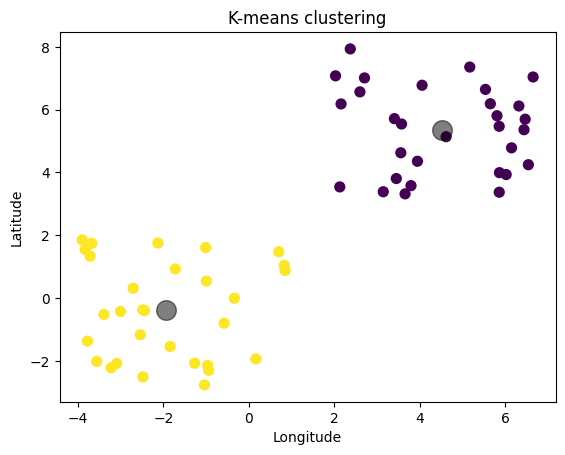

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt

# TODO 1
def load_data(data_path):
    # Load data from the specified path and return as a numpy array of size Nx2
    data = np.loadtxt(data_path, delimiter=',')
    return data

# TODO 2.1
def initialise_centers(data, K, init_centers=None):
    if init_centers is None:
        # Randomly select K unique data points without replacement
        indices = np.random.choice(data.shape[0], K, replace=False)
        centers = data[indices]
    else:
        centers = init_centers
    return centers

# TODO 2.2
def initialise_labels(data):
    # Initialize the labels to all ones
    return np.ones(data.shape[0], dtype=int)

### TODO 3.1 : E step
def calculate_distances(data, centers):
    # Calculate the distance from each data point to each center
    distances = np.linalg.norm(data[:, np.newaxis] - centers, axis=2)
    return distances

# TODO 3.2 : E step
def update_labels(distances):
    # Assign the label of the nearest center to each data point
    return np.argmin(distances, axis=1)

# TODO 4 : M step
def update_centers(data, labels, K):
    centers = np.array([data[labels == k].mean(axis=0) for k in range(K)])
    return centers

# TODO 6 : Check convergence
def check_termination(labels1, labels2):
    # Check if the labels have changed from the previous iteration
    return np.array_equal(labels1, labels2)

### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    data = load_data(data_path)
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)
    start_time = time.time() # Time stamp
    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new):
            break
        else:
            labels = labels_new
    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time

# TODO 7
def visualise(data_path, labels, centers):
    data = load_data(data_path)
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    plt.title('K-means clustering')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.savefig('kmeans.png')  # Save the plot as 'kmeans.png'
    return plt

### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)